In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML


In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

Found 14440 images belonging to 15 classes.


In [4]:
train_generator.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.78404254 0.7644347  0.7879641 ]
  [0.7874758  0.767868   0.7913974 ]
  [0.7909091  0.77130127 0.7948307 ]
  ...
  [0.5270105  0.50740266 0.53093207]
  [0.561853   0.54224515 0.56577456]
  [0.5991343  0.5795265  0.6030559 ]]

 [[0.7194608  0.69985294 0.72338235]
  [0.7220358  0.702428   0.7259574 ]
  [0.7246108  0.70500296 0.7285324 ]
  ...
  [0.52838385 0.508776   0.5323054 ]
  [0.56374127 0.5441334  0.56766284]
  [0.60016435 0.5805565  0.6040859 ]]

 [[0.69370735 0.6740995  0.697629  ]
  [0.6942224  0.67461455 0.69814396]
  [0.6947374  0.67512953 0.69865894]
  ...
  [0.52975714 0.5101493  0.5336787 ]
  [0.5656296  0.54602176 0.56955117]
  [0.60119426 0.5815864  0.60511583]]

 ...

 [[0.71037436 0.69860965 0.7417469 ]
  [0.666982   0.6552173  0.69835454]
  [0.693427   0.6816623  0.7247996 ]
  ...
  [0.52156866 0.5019608  0.5294118 ]
  [0.52156866 0.5019608  0.5294118 ]
  [0.52156866 0.5019608  0.5294118 ]]

 [[0.7076277  0.695863   0.73900026]
  [0.66560864 0.65384394 0.6969812 ]


In [7]:
count=0
for image_batch, label_batch in train_generator:
    print(label_batch)
   # print(image_batch[0])
    break

[12. 12.  3.  9.  9.  5. 14. 14. 10.  9.  6.  1. 14.  5. 12.  2. 14. 11.
  9. 11.  2.  1. 10. 12. 12. 12.  7. 12. 12.  1. 10.  7.]


In [8]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 2058 images belonging to 15 classes.


In [9]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 4140 images belonging to 15 classes.


In [10]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.3662161  0.3662161  0.3662161 ]
  [0.36258063 0.36258063 0.36258063]
  [0.36109087 0.36109087 0.36109087]
  ...
  [0.41704053 0.4091974  0.41311896]
  [0.4020859  0.39424276 0.39816433]
  [0.4111598  0.40331668 0.40723825]]

 [[0.3920376  0.3920376  0.3920376 ]
  [0.38658437 0.38658437 0.38658437]
  [0.382192   0.382192   0.382192  ]
  ...
  [0.42188784 0.41404468 0.41796625]
  [0.3978445  0.39000136 0.39392292]
  [0.41418937 0.40634623 0.4102678 ]]

 [[0.40825227 0.40825227 0.40825227]
  [0.41673508 0.41673508 0.41673508]
  [0.41600144 0.41600144 0.41600144]
  ...
  [0.42072442 0.41288128 0.41680285]
  [0.39784655 0.3900034  0.39392498]
  [0.41384712 0.40600398 0.40992555]]

 ...

 [[0.6467523  0.65459543 0.65067387]
  [0.6434909  0.65133405 0.6474125 ]
  [0.6360956  0.6439387  0.64001715]
  ...
  [0.58167994 0.5895231  0.5777584 ]
  [0.5764706  0.58431375 0.57254905]
  [0.5764706  0.58431375 0.57254905]]

 [[0.6467595  0.65460265 0.6506811 ]
  [0.6426327  0.65047586 0.6465543 ]


In [34]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 15

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [36]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [37]:
history = model.fit(
    train_generator,
    steps_per_epoch=451,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=64,
    verbose=1,
    epochs=3,
)

Epoch 1/3
451/451 [==============================] - 941s 2s/step - loss: 1.5632 - accuracy: 0.5105 - val_loss: 0.8681 - val_accuracy: 0.7183
Epoch 2/3
451/451 [==============================] - 1066s 2s/step - loss: 0.7342 - accuracy: 0.7565 - val_loss: 0.5778 - val_accuracy: 0.8105
Epoch 3/3
451/451 [==============================] - 1066s 2s/step - loss: 0.5048 - accuracy: 0.8304 - val_loss: 0.4583 - val_accuracy: 0.8481


In [38]:
scores = model.evaluate(test_generator)


130/130 [==============================] - 105s 809ms/step - loss: 0.4731 - accuracy: 0.8466


In [39]:
history


In [40]:
history.params


{'verbose': 1, 'epochs': 3, 'steps': 451}

In [41]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

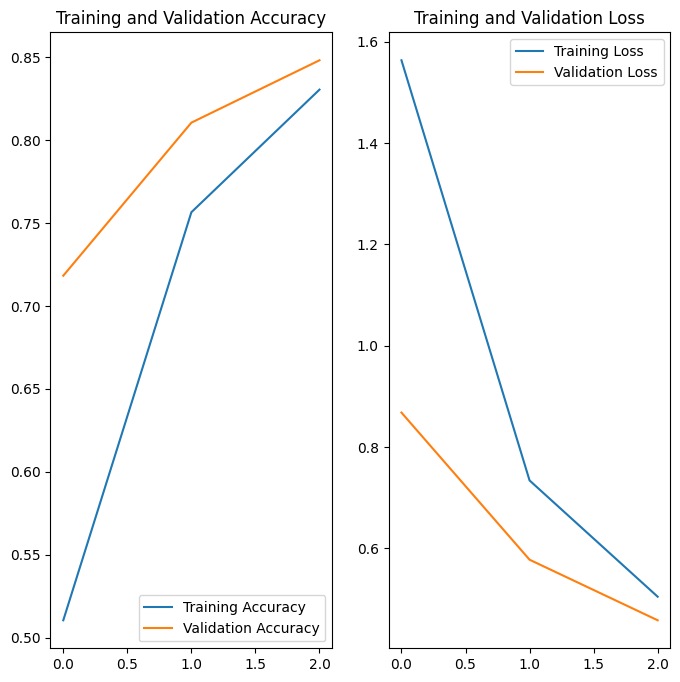

In [43]:
EPOCHS = 3

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Tomato_healthy
1/1 [==============================] - 0s 425ms/step
predicted label: Tomato_healthy


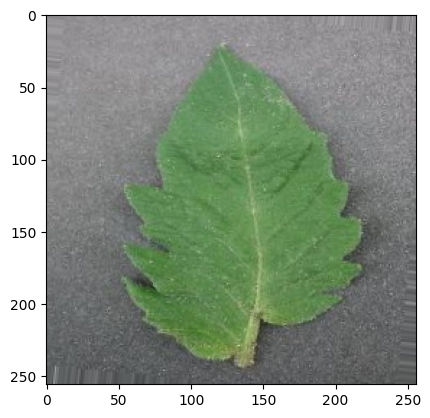

In [44]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [45]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 38ms/step


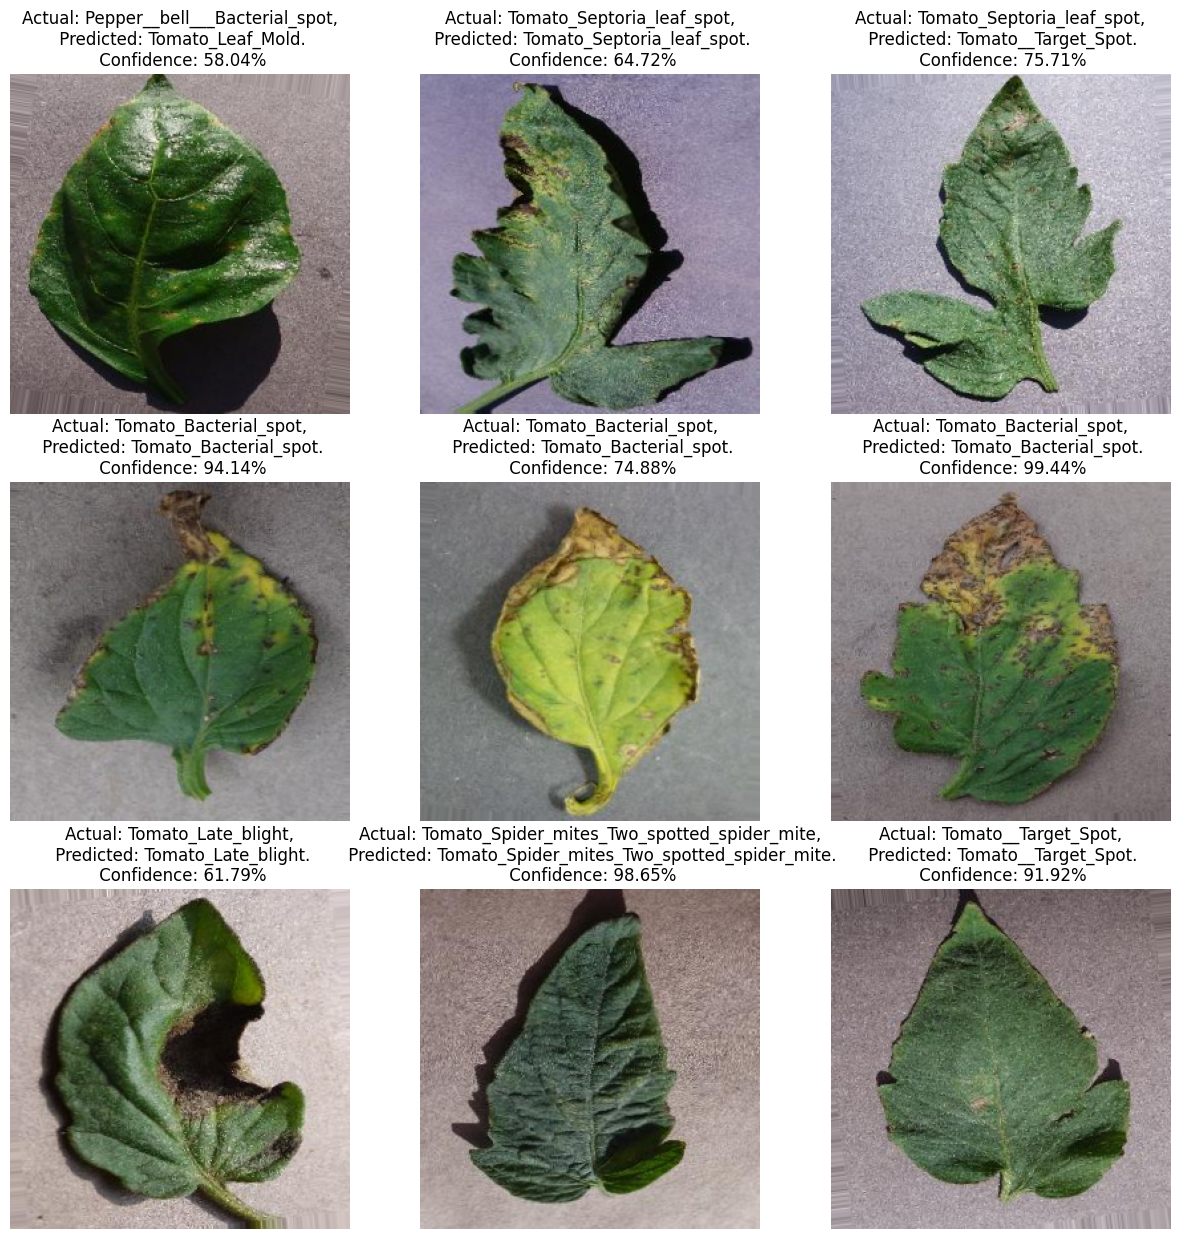

In [46]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [47]:
model_version=8
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/8\assets


INFO:tensorflow:Assets written to: ../models/8\assets
